# sla

In [ ]:
import numpy as np
import math
import random

CIDADES = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

CIDADES_X = [0.77687122, 0.55726533, 0.65639441, 0.60439895, 0.10984792,
            0.30681839, 0.03642046, 0.50750194, 0.79819788, 0.79896875,
            0.14326940, 0.07110193, 0.72613150, 0.22624105, 0.62480412,
            0.54832279, 0.39699388, 0.07545496, 0.67595097, 0.07429705]

CIDADES_Y = [0.27943920, 0.11661366, 0.39053913, 0.66616904, 0.69857584,
            0.20730006, 0.50247213, 0.07393869, 0.67991802, 0.39749278,
            0.14151256, 0.12773617, 0.37197290, 0.69033435, 0.91890348,
            0.52333815, 0.42525695, 0.37166915, 0.99033329, 0.15694232]

NUMERO_INDIVIDUOS = 20
NUMERO_GERACOES = 10000
TAXA_DE_MUTACAO = 5

# Valores utilizado para calcular a função de aptidão
max = sum(d for d in range(1, NUMERO_INDIVIDUOS + 1))
# Para não precisarmos calular as probabilidades todas as vezes, a lista será ordenada ao invés de alterar o cálculo de prob.
probabilidades = [(NUMERO_INDIVIDUOS - d)/max for d in range(0, NUMERO_INDIVIDUOS)]

def main():
  global individuos
  individuos = inicializarIndividuos()

  for _ in range(NUMERO_GERACOES):

    individuos = gerarNovaGeracao(individuos, calcularDistancias(individuos))
    criar_descendentes()

  distancias_finais = calcularDistancias(individuos)
  print(distancias_finais)

  distancias_finais.sort(key=lambda x: x[1])

  qtd_cromossomos = len(individuos)
  qtd_cidades = len(CIDADES)
  melhor_custo = distancias_finais[0][1]
  melhor_solucao = individuos[distancias_finais[0][0]]

  print('Tamanho da População:', qtd_cromossomos)
  print('Taxa de Mutação:', TAXA_DE_MUTACAO)
  print('Número de Cidades:', qtd_cidades)
  print('Melhor Custo:', melhor_custo)
  print('Melhor Solução:', melhor_solucao)

  print('Matriz Melhor Solução:')
  matriz = criar_matriz_distancias(melhor_solucao)
  imprimir_matriz(matriz, melhor_solucao)

def inicializarIndividuos():

  individuos = []

  for _ in range(NUMERO_INDIVIDUOS):
    random.shuffle(CIDADES)
    individuos.append(CIDADES.copy())

  return individuos

def calcularDistancias(individuos: list):

  distancias_totais = []

  # Os indivíduos possuem uma lista com a ordem das cidades
  for [index_ind, individuo] in enumerate(individuos):
    distancia = 0
    for index_cid in range(len(individuos[index_ind])):
      if index_cid != 0:

        # Ambos os indexes tem seu valor por conta da lista começar em 1 e não 0
        cidade_atual = CIDADES[individuo[index_cid] - 1]
        cidade_anterior = CIDADES[individuo[index_cid - 1] - 1]

        # Para calcular a distancia entre dois pontos num plano:
        # d = √(x1 - x2)²  + (y1 - y2)²
        distancia += math.sqrt(math.pow(CIDADES_X[cidade_atual - 1] - CIDADES_X[cidade_anterior - 1], 2) + math.pow(CIDADES_Y[cidade_atual - 1] - CIDADES_Y[cidade_anterior - 1], 2))

    distancias_totais.append((index_ind, distancia))

  return distancias_totais


def gerarNovaGeracao(individuos: list, distancias: list):

  # Ordena a lista de distancias
  distancias.sort(key= lambda dist : dist[1])

  novos_individuos = []

  for _ in range(NUMERO_INDIVIDUOS):
    novos_individuos.append(gerarFilho(escolherPais(individuos, distancias)))

  return novos_individuos

def gerarFilho(pais):

  filho = []

  for cidade in pais[0]:
    filho.append(cidade) if np.random.choice([0,1]) == 1 else filho.append(None)

  cidades_faltando = list(filter(lambda c : (not c in filho), CIDADES))

  for [index, cidade] in enumerate(filho):
    if cidade == None:
      filho[index] = encontrarPrimeiraCidadeFaltando(cidades_faltando, pais[1])

  return filho

def escolherPais(individuos: list, distancias: list):

  # O calculo de peso se dará da seguinte forma:
  # Peso dos itens:
  #  0 -> 20
  #  1 -> 19 ...
  # 19 -> 1

  # Será escolhido um valor com base na lista ordenada de distâncias.
  # Utilizamos esse valor para retornar o objeto completo do indivíduo

  index_pai1 = distancias[np.random.choice(len(individuos), p=probabilidades)][0]

  # Garante que os dois pais não serão o mesmo
  while True:
    index_pai2 = distancias[np.random.choice(len(individuos), p=probabilidades)][0]
    if index_pai1 != index_pai2:
      break

  return (individuos[index_pai1], individuos[index_pai2])


def encontrarPrimeiraCidadeFaltando(cidades_faltando, pai):
  for cidade in pai:
    if cidade in cidades_faltando:
      cidades_faltando.remove(cidade)
      return cidade

def mutacao(descendente):
  num_random = random.randint(1, 100)
  if num_random <= TAXA_DE_MUTACAO:
    cidade_1 = random.randint(0, 19)
    while True:
      cidade_2 = random.randint(0, 19)
      if cidade_1 != cidade_2:
        break
    descendente[cidade_1], descendente[cidade_2] = descendente[cidade_2], descendente[cidade_1]

def cycle(descendente_1, descendente_2, posicao_troca):
  trocar_valores_descendentes(descendente_1, descendente_2, posicao_troca)
  posicao_valor_repetido = validar_se_repete_valor(descendente_1, posicao_troca)
  if posicao_valor_repetido != -1:
    cycle(descendente_1, descendente_2, posicao_valor_repetido)
  else:
    posicao_valor_repetido = validar_se_repete_valor(descendente_2, posicao_troca)
    if posicao_valor_repetido != -1:
      cycle(descendente_1, descendente_2, posicao_valor_repetido)

def trocar_valores_descendentes(descendente_1, descendente_2, posicao):
  descendente_1[posicao], descendente_2[posicao] = descendente_2[posicao], descendente_1[posicao]

def validar_se_repete_valor(array, posicao):
  valor_posicao = array[posicao]
  posicao_valor_repetido = -1
  for i, valor in enumerate(array):
    if valor == valor_posicao and i != posicao:
      posicao_valor_repetido = i
      break
  return posicao_valor_repetido

def criar_descendentes():
    global individuos
    novos_individuos = individuos.copy()
    for i in range(0, 10, 2):
        posicao_randomica = random.randint(0, 19)
        descendente_1 = novos_individuos[i].copy()
        descendente_2 = novos_individuos[i + 1].copy()
        cycle(descendente_1, descendente_2, posicao_randomica)
        mutacao(descendente_1)
        mutacao(descendente_2)
        individuos[i] = descendente_1
        individuos[i + 1] = descendente_2

def criar_matriz_distancias(solucao):
    n = len(solucao)
    matriz = [[0.0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i + 1, n):
            cidade_atual = solucao[i] - 1
            cidade_proxima = solucao[j] - 1
            distancia = math.sqrt(math.pow(CIDADES_X[cidade_atual] - CIDADES_X[cidade_proxima], 2) +
                                  math.pow(CIDADES_Y[cidade_atual] - CIDADES_Y[cidade_proxima], 2))
            matriz[i][j] = distancia
            matriz[j][i] = distancia

    return matriz

def imprimir_matriz(matriz, solucao):
    print(individuos)
    print(f"{'':>10}", end="")
    for i in range(len(matriz)):
        print(f"{solucao[i]:>10}", end="")
    print()

    for i in range(len(matriz)):
        print(f"{solucao[i]:>10}", end="")
        for j in range(len(matriz[i])):
            print(f"{matriz[i][j]:>10.5f}", end="")
        print()


if __name__ == '__main__':
  main()

In [ ]:
import numpy as np
import skfuzzy as fuzz

def main():
    print("Hello World!")

if __name__ == "__main__":
    main()






A solução em Python abaixo é o exercício do vídeo 'Lógica Fuzzy - implementação em python - parte 2' do canal do youtube José Ribeiro. O presente trabalho foi desenvolvido pelos acadêmicos Alani Rigotti, Gabriel Milke, Gabriel Silva e Thiago Karsten para a disciplina
Inteligência Artificial da 5º fase do curso Sistemas de Informação na Furb.  

#LÓGICA FUZZY

1)	Por que um sistema baseado em lógica fuzzy pode ser considerado um sistema inteligente?
R:
  
2)	Qual é a diferença entre a Lógica tradicional e a Lógica Fuzzy?
R:

3)	Explique o que é o grau de verdade ou grau de pertinência.
R: Na Lógica Fuzzy ocorre o grau de pertinência pois um elemento pode fazer parte de conjunto em diferentes graus. Enquanto o grau de verdade

4)	Quais vantagens os sistemas especialistas difusos têm em relação aos sistemas especialistas tradicionais?     
R:
  
5)	A partir da implementação em Python realizada, apresente, com gráficos e valores, exemplos que apresentam custo-benefício médio e alto.
R: Compilar a solução abaixo.


In [ ]:
!pip install scikit-fuzzy > /dev/null 2>&1

P (gráfico 1)
C (gráfico 2)


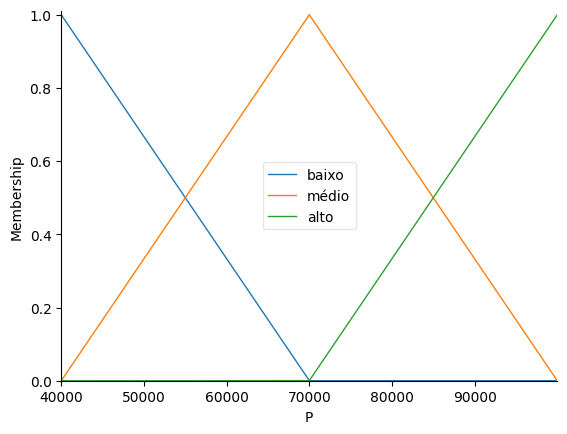

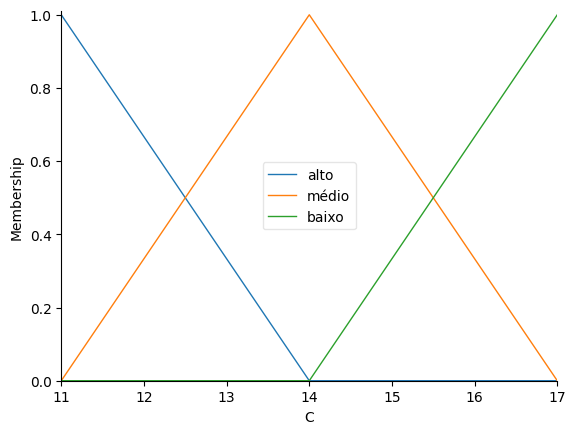

In [34]:
import numpy as np
import skfuzzy as fuzzy #biblioteca responsável por
from skfuzzy import control as controle

# crio os meus paramêtros, definindo valores e nome dele
preco = controle.Antecedent(np.arange(40000, 100000, 1),'P' ) # Antecedent é uma ferramenta da biblioteca skfuzzy que auxilia na criação de varíaveis bidimensionais,
# NP arrange permite que a varíavel aceita mais números, transformando num array
consumo = controle.Antecedent(np.arange(11,18,1),'C')

beneficio = controle.Consequent(np.arange(0,11,0.5),'Benefício') # resultado esperado

preco.automf(number=3, names=['baixo', 'médio','alto'])
consumo.automf(number=3, names=['alto', 'médio', 'baixo'])

# print('   LEGENDA:',      'CUSTO REVISÕES(CR)','\nCONSUMO BAIXO (CB)','\nCUSTO RODOVIÁRIO (C), '\nCUSTO REVISÕES (CR)','\nPREÇO DE AQUISIÇÃO(P)')

def main():

  print('P (gráfico 1)')
  preco.view() and consumo.view()

  consumo.view()
  print('C (gráfico 2)')


if __name__ == "__main__":
    main()